In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sn

In [2]:
import requests
import json

In [3]:
#Open json files
champ = open('data/champion.json')
champ1 = open('data/champion_info.json')
champ2 = open('data/champion_info_2.json')

In [4]:
#Read in json file
data = json.load(champ)
data1 = json.load(champ1)
data2 = json.load(champ2)
champion_dict = {}
champion_diff = {}
champion_stats = {}

In [5]:
data

{'type': 'champion',
 'format': 'standAloneComplex',
 'version': '10.14.1',
 'data': {'Aatrox': {'version': '10.14.1',
   'id': 'Aatrox',
   'key': '266',
   'name': 'Aatrox',
   'title': 'the Darkin Blade',
   'blurb': 'Once honored defenders of Shurima against the Void, Aatrox and his brethren would eventually become an even greater threat to Runeterra, and were defeated only by cunning mortal sorcery. But after centuries of imprisonment, Aatrox was the first to find...',
   'info': {'attack': 8, 'defense': 4, 'magic': 3, 'difficulty': 4},
   'image': {'full': 'Aatrox.png',
    'sprite': 'champion0.png',
    'group': 'champion',
    'x': 0,
    'y': 0,
    'w': 48,
    'h': 48},
   'tags': ['Fighter', 'Tank'],
   'partype': 'Blood Well',
   'stats': {'hp': 580,
    'hpperlevel': 90,
    'mp': 0,
    'mpperlevel': 0,
    'movespeed': 345,
    'armor': 38,
    'armorperlevel': 3.25,
    'spellblock': 32.1,
    'spellblockperlevel': 1.25,
    'attackrange': 175,
    'hpregen': 3,
    'h

In [6]:
df=pd.read_json('data/champion.json')

In [7]:
list(data['data'].keys())[0]

'Aatrox'

In [8]:
df['data'][0]['id']

'Aatrox'

In [9]:
df.index

Index(['Aatrox', 'Ahri', 'Akali', 'Alistar', 'Amumu', 'Anivia', 'Annie',
       'Aphelios', 'Ashe', 'AurelionSol',
       ...
       'XinZhao', 'Yasuo', 'Yorick', 'Yuumi', 'Zac', 'Zed', 'Ziggs', 'Zilean',
       'Zoe', 'Zyra'],
      dtype='object', length=148)

In [10]:
data['data']

{'Aatrox': {'version': '10.14.1',
  'id': 'Aatrox',
  'key': '266',
  'name': 'Aatrox',
  'title': 'the Darkin Blade',
  'blurb': 'Once honored defenders of Shurima against the Void, Aatrox and his brethren would eventually become an even greater threat to Runeterra, and were defeated only by cunning mortal sorcery. But after centuries of imprisonment, Aatrox was the first to find...',
  'info': {'attack': 8, 'defense': 4, 'magic': 3, 'difficulty': 4},
  'image': {'full': 'Aatrox.png',
   'sprite': 'champion0.png',
   'group': 'champion',
   'x': 0,
   'y': 0,
   'w': 48,
   'h': 48},
  'tags': ['Fighter', 'Tank'],
  'partype': 'Blood Well',
  'stats': {'hp': 580,
   'hpperlevel': 90,
   'mp': 0,
   'mpperlevel': 0,
   'movespeed': 345,
   'armor': 38,
   'armorperlevel': 3.25,
   'spellblock': 32.1,
   'spellblockperlevel': 1.25,
   'attackrange': 175,
   'hpregen': 3,
   'hpregenperlevel': 1,
   'mpregen': 0,
   'mpregenperlevel': 0,
   'crit': 0,
   'critperlevel': 0,
   'attackdama

In [11]:
df['data'][df.index[0]]['key']

'266'

In [12]:
for k, item in enumerate(df.index):
    champion_dict[df['data'][k]['id']] = df['data'][item]['key']

In [13]:
#Dictionary of champions & their corresponding code
champion_dict

{'Aatrox': '266',
 'Ahri': '103',
 'Akali': '84',
 'Alistar': '12',
 'Amumu': '32',
 'Anivia': '34',
 'Annie': '1',
 'Aphelios': '523',
 'Ashe': '22',
 'AurelionSol': '136',
 'Azir': '268',
 'Bard': '432',
 'Blitzcrank': '53',
 'Brand': '63',
 'Braum': '201',
 'Caitlyn': '51',
 'Camille': '164',
 'Cassiopeia': '69',
 'Chogath': '31',
 'Corki': '42',
 'Darius': '122',
 'Diana': '131',
 'DrMundo': '36',
 'Draven': '119',
 'Ekko': '245',
 'Elise': '60',
 'Evelynn': '28',
 'Ezreal': '81',
 'Fiddlesticks': '9',
 'Fiora': '114',
 'Fizz': '105',
 'Galio': '3',
 'Gangplank': '41',
 'Garen': '86',
 'Gnar': '150',
 'Gragas': '79',
 'Graves': '104',
 'Hecarim': '120',
 'Heimerdinger': '74',
 'Illaoi': '420',
 'Irelia': '39',
 'Ivern': '427',
 'Janna': '40',
 'JarvanIV': '59',
 'Jax': '24',
 'Jayce': '126',
 'Jhin': '202',
 'Jinx': '222',
 'Kaisa': '145',
 'Kalista': '429',
 'Karma': '43',
 'Karthus': '30',
 'Kassadin': '38',
 'Katarina': '55',
 'Kayle': '10',
 'Kayn': '141',
 'Kennen': '85',
 'Kh

In [14]:
for k, item in enumerate(df.index):
    champion_diff[df['data'][k]['id']] = df['data'][item]['info']

In [15]:
champion_diff

{'Aatrox': {'attack': 8, 'defense': 4, 'magic': 3, 'difficulty': 4},
 'Ahri': {'attack': 3, 'defense': 4, 'magic': 8, 'difficulty': 5},
 'Akali': {'attack': 5, 'defense': 3, 'magic': 8, 'difficulty': 7},
 'Alistar': {'attack': 6, 'defense': 9, 'magic': 5, 'difficulty': 7},
 'Amumu': {'attack': 2, 'defense': 6, 'magic': 8, 'difficulty': 3},
 'Anivia': {'attack': 1, 'defense': 4, 'magic': 10, 'difficulty': 10},
 'Annie': {'attack': 2, 'defense': 3, 'magic': 10, 'difficulty': 6},
 'Aphelios': {'attack': 6, 'defense': 2, 'magic': 1, 'difficulty': 10},
 'Ashe': {'attack': 7, 'defense': 3, 'magic': 2, 'difficulty': 4},
 'AurelionSol': {'attack': 2, 'defense': 3, 'magic': 8, 'difficulty': 7},
 'Azir': {'attack': 6, 'defense': 3, 'magic': 8, 'difficulty': 9},
 'Bard': {'attack': 4, 'defense': 4, 'magic': 5, 'difficulty': 9},
 'Blitzcrank': {'attack': 4, 'defense': 8, 'magic': 5, 'difficulty': 4},
 'Brand': {'attack': 2, 'defense': 2, 'magic': 9, 'difficulty': 4},
 'Braum': {'attack': 3, 'defen

In [16]:
for k, item in enumerate(df.index):
    champion_stats[df['data'][k]['id']] = df['data'][item]['stats']

In [17]:
champion_stats

{'Aatrox': {'hp': 580,
  'hpperlevel': 90,
  'mp': 0,
  'mpperlevel': 0,
  'movespeed': 345,
  'armor': 38,
  'armorperlevel': 3.25,
  'spellblock': 32.1,
  'spellblockperlevel': 1.25,
  'attackrange': 175,
  'hpregen': 3,
  'hpregenperlevel': 1,
  'mpregen': 0,
  'mpregenperlevel': 0,
  'crit': 0,
  'critperlevel': 0,
  'attackdamage': 60,
  'attackdamageperlevel': 5,
  'attackspeedperlevel': 2.5,
  'attackspeed': 0.651},
 'Ahri': {'hp': 526,
  'hpperlevel': 92,
  'mp': 418,
  'mpperlevel': 25,
  'movespeed': 330,
  'armor': 20.88,
  'armorperlevel': 3.5,
  'spellblock': 30,
  'spellblockperlevel': 0.5,
  'attackrange': 550,
  'hpregen': 6.5,
  'hpregenperlevel': 0.6000000000000001,
  'mpregen': 8,
  'mpregenperlevel': 0.8,
  'crit': 0,
  'critperlevel': 0,
  'attackdamage': 53.04,
  'attackdamageperlevel': 3,
  'attackspeedperlevel': 2,
  'attackspeed': 0.668},
 'Akali': {'hp': 575,
  'hpperlevel': 95,
  'mp': 200,
  'mpperlevel': 0,
  'movespeed': 345,
  'armor': 23,
  'armorperleve

In [18]:
ew = pd.DataFrame(champion_dict.items(), columns = ['Champion', 'Code'])

In [19]:
aa = pd.DataFrame(champion_diff.items(), columns = ['Champion', 'Info'])

In [20]:
bb = pd.DataFrame(champion_stats.items(), columns = ['Champion', 'Stats'])

In [21]:
data['data'][list(data['data'].keys())[0]]['key']

'266'

In [22]:
#Might get updated data from Riot Games website(API) - season 10
requests.get('https://na1.api.riotgames.com/lol/platform/v3/champion-rotations?api_key=RGAPI-916fc650-2890-457d-aada-2686e5cfca85')

<Response [403]>

In [23]:
response = requests.get('https://na1.api.riotgames.com/lol/platform/v3/champion-rotations?api_key=RGAPI-916fc650-2890-457d-aada-2686e5cfca85')

response.json()

{'status': {'message': 'Forbidden', 'status_code': 403}}

In [24]:
dfr = pd.read_csv('data/games.csv')

In [25]:
dfr

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [26]:
dfr.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [27]:
#input champion's name & their level of difficultly from json file data
dfr[['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id','t2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']]

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,8,432,96,11,112,104,498,122,238,412
1,119,39,76,10,35,54,25,120,157,92
2,18,141,267,68,38,69,412,126,24,22
3,57,63,29,61,36,90,19,412,92,22
4,19,29,40,119,134,37,59,141,38,51
...,...,...,...,...,...,...,...,...,...,...
51485,19,429,91,432,64,45,83,67,40,79
51486,90,32,31,412,18,102,429,89,75,45
51487,141,18,432,81,68,1,119,33,43,99
51488,121,236,420,201,99,21,56,25,30,11


# CORRELATION SECTION

In [71]:
dfr.corr()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
gameId,1.000000,0.999866,-0.003505,NaN,0.015197,0.017101,0.012554,0.008475,0.013382,0.005571,...,0.010252,0.010636,0.014530,-0.002018,-0.017837,-0.036884,-0.038103,-0.037254,-0.042139,-0.045027
creationTime,0.999866,1.000000,-0.003470,NaN,0.015357,0.017157,0.012628,0.008557,0.013397,0.005547,...,0.010383,0.010798,0.014582,-0.002007,-0.017664,-0.036671,-0.038080,-0.037110,-0.042094,-0.044954
gameDuration,-0.003505,-0.003470,1.000000,NaN,0.024187,0.105022,0.216842,0.379996,0.487788,0.255563,...,0.396769,0.319451,0.429793,0.416995,0.007818,0.004853,-0.001518,0.009548,0.009976,0.008206
seasonId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
winner,0.015197,0.015357,0.024187,NaN,1.000000,0.174770,0.375697,0.536437,0.261888,0.310386,...,0.785813,0.660452,0.399249,0.497206,0.226102,-0.003714,0.000322,0.000046,-0.003010,-0.002691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t2_ban1,-0.036884,-0.036671,0.004853,NaN,-0.003714,0.005265,-0.003668,-0.004185,-0.008986,-0.000779,...,-0.003555,-0.001794,-0.001642,-0.003744,0.000775,1.000000,-0.010048,-0.007541,-0.005309,-0.005866
t2_ban2,-0.038103,-0.038080,-0.001518,NaN,0.000322,-0.003818,-0.005956,-0.011025,-0.012893,-0.007619,...,-0.005946,-0.003955,-0.007644,-0.007808,-0.011229,-0.010048,1.000000,-0.012252,-0.018309,-0.004804
t2_ban3,-0.037254,-0.037110,0.009548,NaN,0.000046,0.004698,0.002348,-0.007650,-0.008572,-0.004045,...,0.000329,0.003024,-0.002151,0.000146,-0.006550,-0.007541,-0.012252,1.000000,-0.018183,-0.005805
t2_ban4,-0.042139,-0.042094,0.009976,NaN,-0.003010,0.001483,0.000878,-0.008131,-0.005207,0.002753,...,-0.001870,-0.006311,-0.001956,-0.000680,-0.007342,-0.005309,-0.018309,-0.018183,1.000000,-0.016506


In [28]:
champs_time_corr = dfr[['gameDuration','t1_champ1id','t1_champ2id','t1_champ3id',
                       't1_champ4id','t1_champ5id','t2_champ1id',
                       't2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']]

In [29]:
champs_time_corr.corr()

,gameDuration,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
gameDuration,1.000000,0.000607,-0.007822,-0.005342,-0.011403,-0.011919,-0.004493,-0.012179,-0.006773,-0.005760,0.000793
t1_champ1id,0.000607,1.000000,0.037926,-0.008577,-0.006324,0.000385,-0.009843,-0.005581,-0.012405,-0.012458,-0.004071
t1_champ2id,-0.007822,0.037926,1.000000,0.025237,0.000611,-0.007698,-0.016459,-0.010859,-0.006753,-0.008993,-0.002352
t1_champ3id,-0.005342,-0.008577,0.025237,1.000000,0.015027,0.003684,-0.012822,-0.005659,-0.011734,-0.009215,-0.010943
t1_champ4id,-0.011403,-0.006324,0.000611,0.015027,1.000000,0.046796,-0.012062,-0.005148,-0.004776,-0.008782,-0.014368
t1_champ5id,-0.011919,0.000385,-0.007698,0.003684,0.046796,1.000000,0.000437,-0.011061,-0.000456,-0.008759,-0.006552
t2_champ1id,-0.004493,-0.009843,-0.016459,-0.012822,-0.012062,0.000437,1.000000,0.040445,-0.007463,-0.010158,-0.000492
t2_champ2id,-0.012179,-0.005581,-0.010859,-0.005659,-0.005148,-0.011061,0.040445,1.000000,0.019831,-0.005441,-0.012012
t2_champ3id,-0.006773,-0.012405,-0.006753,-0.011734,-0.004776,-0.000456,-0.007463,0.019831,1.000000,0.016928,0.003039
t2_champ4id,-0.005760,-0.012458,-0.008993,-0.009215,-0.008782,-0.008759,-0.010158,-0.005441,0.016928,1.000000,0.032989


In [30]:
wins_first_obj_corr = dfr[['winner','firstBlood', 'firstTower', 
                          'firstInhibitor', 'firstBaron',
                          'firstDragon', 'firstRiftHerald']]

## Strong correlation between 'first Inhibitor' & 'winner'

In [31]:
#Postive correlation on taking first objective
wins_first_obj_corr.corr()

,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
winner,1.000000,0.174770,0.375697,0.536437,0.261888,0.310386,0.119813
firstBlood,0.174770,1.000000,0.263866,0.169761,0.077293,0.189092,0.084062
firstTower,0.375697,0.263866,1.000000,0.380326,0.165028,0.403552,0.185989
firstInhibitor,0.536437,0.169761,0.380326,1.000000,0.417848,0.352760,0.166521
firstBaron,0.261888,0.077293,0.165028,0.417848,1.000000,0.201065,0.120714
firstDragon,0.310386,0.189092,0.403552,0.352760,0.201065,1.000000,0.159429
firstRiftHerald,0.119813,0.084062,0.185989,0.166521,0.120714,0.159429,1.000000


In [32]:
coorMatrix1 = wins_first_obj_corr.corr()

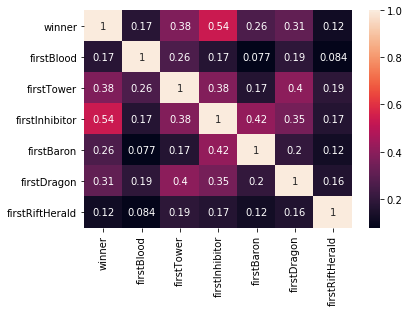

In [33]:
sn.heatmap(coorMatrix1, annot=True)
plt.show()

In [34]:
wins_amount_obj_corr = dfr[['winner','t1_towerKills', 't1_inhibitorKills', 
                           't1_baronKills','t1_dragonKills',
                           't1_riftHeraldKills','t2_towerKills',
                           't2_inhibitorKills', 't2_baronKills',
                           't2_dragonKills','t2_riftHeraldKills']]

## Strong correlation between amount of 'Inhibitors' taken, 'Towers' taken & 'winner'

In [35]:
coorM = wins_amount_obj_corr.corr()
coorM

,winner,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
winner,1.000000,-0.771541,-0.649405,-0.369472,-0.472483,-0.218066,0.785813,0.660452,0.399249,0.497206,0.226102
t1_towerKills,-0.771541,1.000000,0.824471,0.490723,0.626743,0.283925,-0.549123,-0.469600,-0.158556,-0.313789,-0.224888
t1_inhibitorKills,-0.649405,0.824471,1.000000,0.481606,0.538469,0.210728,-0.467867,-0.408924,-0.153026,-0.279089,-0.164355
t1_baronKills,-0.369472,0.490723,0.481606,1.000000,0.409380,0.119870,-0.144271,-0.146382,-0.189526,-0.027525,-0.053148
t1_dragonKills,-0.472483,0.626743,0.538469,0.409380,1.000000,0.203930,-0.303139,-0.269714,-0.033048,-0.486093,-0.159509
t1_riftHeraldKills,-0.218066,0.283925,0.210728,0.119870,0.203930,1.000000,-0.214717,-0.157812,-0.053136,-0.149586,-0.325805
t2_towerKills,0.785813,-0.549123,-0.467867,-0.144271,-0.303139,-0.214717,1.000000,0.825834,0.522166,0.648020,0.290283
t2_inhibitorKills,0.660452,-0.469600,-0.408924,-0.146382,-0.269714,-0.157812,0.825834,1.000000,0.499613,0.548134,0.216553
t2_baronKills,0.399249,-0.158556,-0.153026,-0.189526,-0.033048,-0.053136,0.522166,0.499613,1.000000,0.444655,0.124451
t2_dragonKills,0.497206,-0.313789,-0.279089,-0.027525,-0.486093,-0.149586,0.648020,0.548134,0.444655,1.000000,0.220556


In [36]:
mas = np.triu(np.ones_like(coorM, dtype=np.bool))

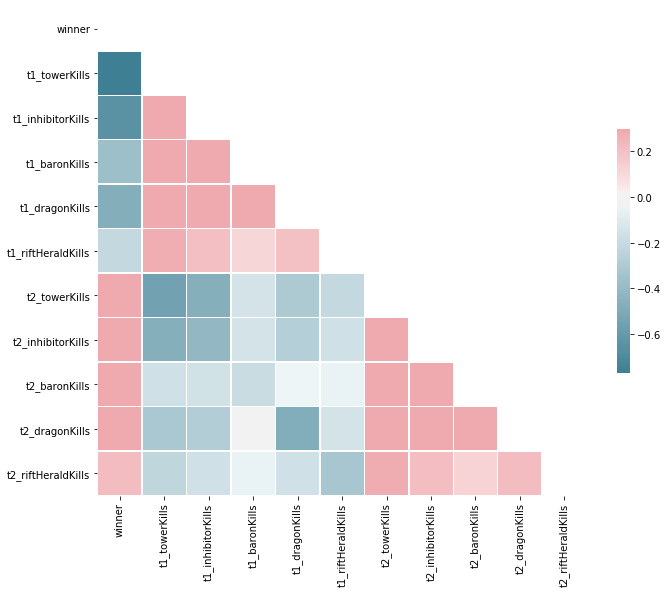

In [37]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(coorM, mask=mas, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [38]:
#Creating dataframe of champions dictionary to adjust games csv file via Excel
#occam's razor - I figure Pandas/numpy method later

In [39]:
plt.style.use('seaborn-darkgrid')

'''
def get_key(val): 
    for key, value in champion_dict.items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"
    '''

In [40]:
#get_key(266)

### CHAMPION SELECTED THE MOST

In [41]:
vc = pd.DataFrame(dfr['t1_champ1id'].value_counts())
vc

,t1_champ1id
18,1299
412,1182
67,1030
141,1006
64,906
...,...
30,98
266,96
136,84
427,80


<BarContainer object of 138 artists>

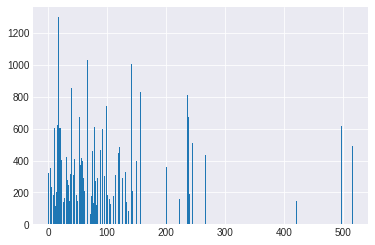

In [42]:
plt.bar(vc.index,vc['t1_champ1id'])

In [55]:
ls = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id','t2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']

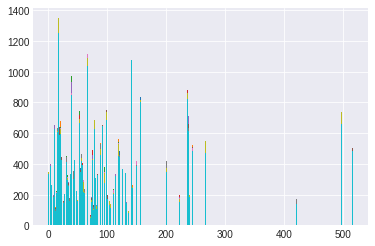

In [69]:
for a in ls:
    td = pd.DataFrame(dfr[a].value_counts())
    plt.bar(td.index,td[a])

### WINS BY TEAM1 & TEAM2

In [43]:
dfr['winner']

0        1
1        1
2        1
3        1
4        1
        ..
51485    2
51486    2
51487    2
51488    2
51489    1
Name: winner, Length: 51490, dtype: int64

In [44]:
winner_team = pd.DataFrame(dfr['winner'].value_counts())
winner_team

,winner
1,26077
2,25413


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

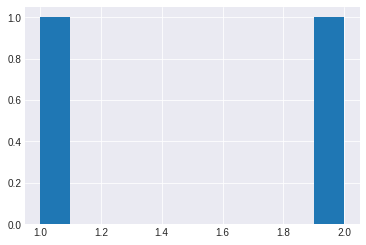

In [45]:
plt.hist((winner_team.index))

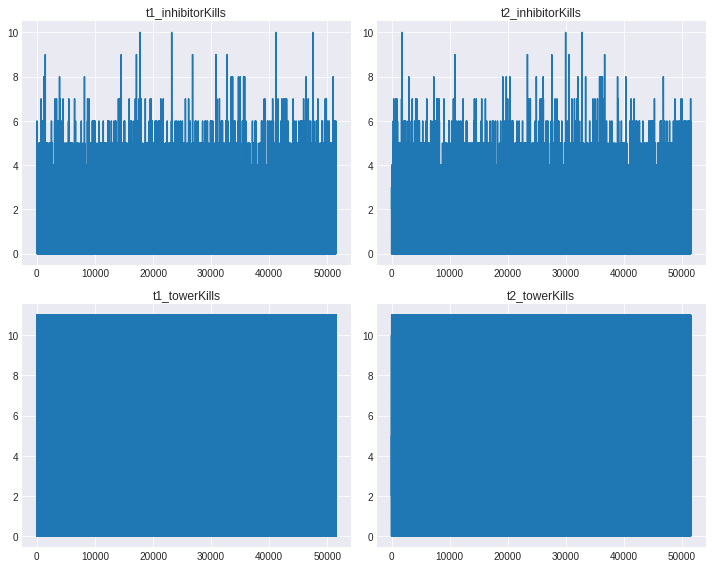

In [84]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(10)
dfr['t1_inhibitorKills'].plot(ax=axes[0,0]); axes[0,0].set_title('t1_inhibitorKills')
dfr['t2_inhibitorKills'].plot(ax=axes[0,1]); axes[0,1].set_title('t2_inhibitorKills')
dfr['t1_towerKills'].plot(ax=axes[1,0]); axes[1,0].set_title('t1_towerKills')
dfr['t2_towerKills'].plot(ax=axes[1,1]); axes[1,1].set_title('t2_towerKills')
fig.tight_layout()

In [46]:
#def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    #if jitter:
        #jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    #else:
        #jitter = np.repeat(0.0, len(data))
    #ax.scatter(data, jitter, **options)
    #ax.yaxis.set_ticklabels([])
    #ax.set_ylim([-1, 1])

In [47]:
#for ch, v in champion_dict.items():
    #dfr['TEAM1_CHAMPION1'] = np.where(dfr['t1_champ1id'] = v, ch, False)

In [48]:
#new_dafr = dfr.join(d_set)

In [49]:
#new_dafr

In [50]:
champion_dict

{'Aatrox': '266',
 'Ahri': '103',
 'Akali': '84',
 'Alistar': '12',
 'Amumu': '32',
 'Anivia': '34',
 'Annie': '1',
 'Aphelios': '523',
 'Ashe': '22',
 'AurelionSol': '136',
 'Azir': '268',
 'Bard': '432',
 'Blitzcrank': '53',
 'Brand': '63',
 'Braum': '201',
 'Caitlyn': '51',
 'Camille': '164',
 'Cassiopeia': '69',
 'Chogath': '31',
 'Corki': '42',
 'Darius': '122',
 'Diana': '131',
 'DrMundo': '36',
 'Draven': '119',
 'Ekko': '245',
 'Elise': '60',
 'Evelynn': '28',
 'Ezreal': '81',
 'Fiddlesticks': '9',
 'Fiora': '114',
 'Fizz': '105',
 'Galio': '3',
 'Gangplank': '41',
 'Garen': '86',
 'Gnar': '150',
 'Gragas': '79',
 'Graves': '104',
 'Hecarim': '120',
 'Heimerdinger': '74',
 'Illaoi': '420',
 'Irelia': '39',
 'Ivern': '427',
 'Janna': '40',
 'JarvanIV': '59',
 'Jax': '24',
 'Jayce': '126',
 'Jhin': '202',
 'Jinx': '222',
 'Kaisa': '145',
 'Kalista': '429',
 'Karma': '43',
 'Karthus': '30',
 'Kassadin': '38',
 'Katarina': '55',
 'Kayle': '10',
 'Kayn': '141',
 'Kennen': '85',
 'Kh

In [51]:
for a in dfr['t1_champ1id']:
    print(a)

8
119
18
57
19
40
74
150
111
427
99
22
79
143
40
23
67
114
222
421
134
238
96
122
498
41
67
19
78
412
8
497
24
67
412
157
25
35
240
24
43
92
85
222
35
150
24
41
126
22
63
18
69
23
497
238
24
10
11
150
24
119
74
238
111
24
21
420
61
67
75
8
79
238
141
497
8
245
103
105
69
18
63
59
245
254
5
15
45
106
81
141
254
131
236
201
48
9
25
119
96
31
19
99
117
19
4
412
64
412
28
82
105
117
157
240
101
18
268
61
27
96
62
4
9
122
59
63
141
53
143
245
498
432
67
115
86
105
516
40
54
163
3
110
22
497
157
13
119
64
157
37
29
48
122
40
54
92
29
141
497
8
99
43
38
103
79
150
92
24
92
64
64
53
119
254
266
110
33
421
90
412
79
35
57
40
18
121
1
141
222
19
412
497
45
115
62
105
33
37
9
11
80
111
120
516
103
1
412
79
101
63
412
18
238
24
432
111
33
11
412
236
150
4
113
99
222
43
16
141
113
267
150
12
161
150
5
79
412
103
17
240
412
69
64
67
119
40
236
111
268
99
34
107
15
64
117
99
22
51
22
201
117
76
119
21
19
16
516
119
161
161
16
61
12
79
4
41
117
57
42
4
432
103
38
157
25
117
35
58
254
59
141
103
85
126

103
202
38
427
51
29
43
23
81
236
53
64
202
115
117
18
222
119
113
61
516
59
141
412
80
31
79
201
141
7
36
498
67
412
254
37
59
202
117
141
114
51
122
236
36
5
1
17
157
53
121
238
202
69
432
19
29
11
64
89
141
141
150
58
89
58
497
267
21
412
429
236
75
35
161
17
55
16
78
90
55
202
40
17
238
9
79
51
36
103
126
45
30
429
40
64
54
86
81
83
11
127
91
21
67
64
18
99
81
19
412
42
11
157
157
113
19
114
18
141
516
432
11
113
57
51
107
54
25
29
18
41
83
75
107
5
121
89
64
16
15
28
8
19
2
11
113
18
37
516
131
98
45
412
122
81
141
59
131
117
35
254
110
16
119
141
89
25
43
98
79
58
79
154
11
126
81
113
429
63
240
245
67
1
25
77
69
102
59
222
33
67
107
45
157
245
117
202
92
202
143
122
29
29
76
96
516
68
40
420
254
498
16
99
201
161
90
38
18
236
25
412
41
121
498
115
62
91
51
202
17
27
67
119
238
62
13
92
498
67
21
497
75
115
222
7
35
18
89
74
83
60
112
58
412
497
429
25
91
28
34
143
20
54
11
134
117
131
22
31
37
41
91
202
202
516
412
516
236
34
103
3
29
69
37
60
114
51
78
202
105
222
498
16
63
5
1

432
68
119
429
127
141
516
11
89
25
59
3
21
63
157
14
48
90
267
43
21
10
8
32
61
74
58
254
33
17
37
45
85
81
7
18
60
222
17
39
92
40
44
25
92
69
113
33
157
37
202
24
43
61
24
34
134
432
114
18
222
64
51
113
92
8
22
51
119
268
497
84
29
64
98
64
38
21
45
236
67
10
412
115
19
67
59
19
122
38
202
55
236
157
60
115
61
9
267
29
236
134
64
80
157
99
115
61
5
115
421
25
86
51
157
57
4
67
42
67
1
497
429
38
104
14
107
236
498
267
238
59
60
45
120
55
63
222
141
59
11
238
238
78
16
23
99
126
122
412
15
134
107
238
40
16
24
516
74
254
21
103
117
117
22
92
75
412
43
18
110
429
75
61
103
429
75
104
134
497
103
122
99
18
81
81
120
201
161
43
81
157
126
113
201
141
42
23
79
429
498
53
78
498
89
10
91
99
81
67
98
18
150
21
157
53
222
117
84
105
67
412
60
16
58
141
61
3
421
29
203
18
238
22
113
54
5
64
64
18
497
110
18
110
236
28
245
38
119
55
412
238
21
134
67
80
82
90
103
92
43
81
21
96
78
141
498
91
113
238
5
15
412
141
429
6
18
29
44
236
497
27
497
86
27
150
57
238
51
59
114
412
119
498
9
105
412
6

91
96
9
90
67
11
35
119
11
114
157
120
163
68
44
110
90
429
89
39
41
150
119
141
67
141
51
80
18
43
37
113
497
11
67
119
245
45
67
106
412
157
79
99
10
32
516
222
64
99
11
202
76
29
40
141
267
25
157
17
64
236
67
21
141
202
21
91
107
61
40
498
85
16
267
238
412
127
7
26
412
421
412
64
222
113
429
19
236
136
86
498
202
21
8
203
32
37
79
31
120
60
23
75
238
43
23
24
40
84
50
103
18
114
103
79
29
126
238
61
3
91
41
11
44
202
18
17
41
86
61
110
59
92
432
54
114
64
89
28
110
150
29
96
1
121
203
412
40
498
1
412
150
113
53
61
497
40
11
8
16
106
64
222
141
51
91
238
238
429
99
48
21
89
16
498
121
17
202
412
89
24
26
45
50
22
24
432
55
31
59
58
141
8
53
91
163
13
154
11
99
134
26
497
4
3
45
18
28
39
43
254
120
112
21
223
10
18
41
110
150
67
113
75
412
92
498
245
202
115
154
24
412
85
115
59
23
161
121
16
11
54
92
64
29
43
78
53
21
80
32
62
133
75
112
126
25
29
141
16
161
114
24
37
48
421
91
113
79
1
89
122
236
141
39
11
92
37
432
21
25
104
59
81
29
103
36
157
84
62
18
74
99
150
497
267
45
432


75
119
58
99
1
81
161
157
21
82
51
120
412
48
53
92
131
16
89
37
8
3
120
202
59
412
10
15
61
412
107
16
107
45
81
31
222
10
105
17
27
4
83
13
67
1
74
80
3
72
21
59
1
121
516
37
19
5
48
7
55
42
41
25
27
4
67
223
23
202
103
5
41
18
79
45
222
61
103
79
35
222
150
67
59
45
25
236
17
21
38
157
98
84
202
16
29
22
24
57
157
44
18
16
90
51
497
60
92
236
141
53
92
64
17
8
81
103
60
105
67
24
412
92
5
31
44
267
157
39
41
27
92
23
38
51
161
516
5
24
29
75
67
25
51
110
236
81
38
203
85
516
104
12
267
16
5
56
163
103
96
38
35
412
19
57
99
75
67
236
18
45
45
42
240
23
141
268
24
55
236
23
245
31
113
111
38
64
18
75
254
121
154
91
131
3
516
37
141
61
516
157
202
79
133
90
141
268
238
240
3
516
48
58
29
157
3
103
28
22
498
131
90
427
103
254
238
117
9
9
8
143
420
86
41
54
429
245
202
92
41
74
50
16
84
6
131
18
67
23
34
10
104
497
74
267
22
143
134
121
55
84
64
150
150
99
22
53
14
29
107
42
240
29
202
117
85
133
18
59
11
25
245
105
157
203
92
18
62
222
67
64
498
32
4
1
164
20
141
48
18
113
22
201
412
4

11
80
119
64
236
29
51
16
92
45
81
516
53
114
4
421
79
126
82
98
4
202
134
64
113
516
24
19
30
240
61
498
42
51
85
103
117
64
44
202
42
203
113
1
39
429
101
83
432
83
15
16
222
141
84
29
40
4
154
55
69
24
134
6
26
122
141
99
412
8
43
12
222
90
98
64
80
163
53
412
29
67
21
2
107
8
23
41
16
134
17
44
45
9
55
22
8
222
11
238
23
105
131
39
23
1
498
51
141
267
38
61
113
37
42
84
81
412
122
24
67
34
497
53
202
90
134
14
17
19
64
67
114
61
103
121
412
84
141
18
117
157
74
57
8
157
150
141
412
31
37
498
201
69
19
60
429
18
22
103
53
157
67
25
53
119
89
18
238
117
267
31
80
15
44
143
412
238
40
81
29
421
114
163
72
24
105
412
17
40
29
122
268
18
11
57
121
19
106
18
222
96
222
64
59
60
92
106
119
22
59
236
497
245
86
81
75
68
53
238
44
68
27
39
412
53
62
117
69
121
40
21
498
238
121
141
81
75
6
143
498
19
11
22
59
67
16
420
412
79
101
11
22
6
18
498
24
141
245
161
43
498
13
126
36
157
267
498
51
14
157
79
266
64
69
113
75
64
27
222
104
43
17
19
8
106
141
157
43
238
61
36
61
18
84
2
105
99
64
67


17
202
121
81
6
99
81
412
42
90
89
68
55
90
59
61
69
5
412
96
222
121
113
202
516
79
18
497
238
61
18
9
43
161
41
163
222
201
24
89
16
36
222
222
497
59
44
64
25
222
61
3
37
22
498
78
18
25
79
25
113
498
432
34
64
114
115
267
154
497
55
105
64
81
40
92
14
5
57
79
53
51
18
99
76
59
19
28
163
69
115
141
267
497
62
40
57
18
498
61
69
126
84
29
51
114
41
238
103
20
1
67
126
8
45
81
79
157
497
67
11
45
34
24
266
29
1
131
497
64
59
41
2
19
7
103
38
69
67
110
23
201
20
24
110
110
42
21
18
44
133
40
120
115
25
150
75
33
55
412
238
21
18
64
86
32
75
222
58
103
64
222
36
245
84
53
107
79
9
53
18
19
22
63
150
79
48
40
141
5
498
22
9
3
222
12
4
240
254
119
99
4
12
75
17
240
26
59
427
412
90
67
236
2
64
105
498
150
497
85
53
67
516
54
20
497
161
55
72
92
25
134
79
412
29
154
55
29
15
90
41
157
150
53
23
16
38
202
32
112
154
22
40
236
117
79
412
11
62
245
84
57
121
29
98
17
202
29
11
21
44
29
10
61
498
127
136
412
90
24
2
64
54
15
104
4
81
61
79
516
107
34
104
68
42
117
34
40
101
161
99
432
11
57
32

44
75
43
54
17
25
112
412
113
25
498
497
498
54
5
15
99
64
61
141
85
19
77
141
154
29
92
498
161
22
7
110
29
53
127
163
420
84
150
122
63
86
63
22
25
58
161
16
18
110
16
113
18
91
10
201
40
412
51
201
20
201
150
412
81
50
19
84
164
7
33
59
134
86
11
74
104
412
202
222
63
64
111
117
61
81
236
3
103
18
64
80
161
91
157
102
202
18
86
17
99
96
15
18
22
245
45
141
12
67
163
50
75
103
75
51
23
34
497
85
2
516
37
11
412
59
40
5
11
92
163
90
17
4
131
163
202
75
61
117
53
15
18
99
40
28
102
222
497
131
38
202
103
119
18
24
31
115
77
119
516
21
102
238
33
64
238
63
432
4
92
32
15
105
50
516
83
41
11
163
86
11
57
81
99
25
8
203
61
61
134
75
202
79
141
91
421
2
161
55
157
236
131
15
120
498
76
40
236
41
101
498
34
161
61
55
111
111
35
99
38
51
17
39
6
61
201
6
79
83
201
131
203
119
67
245
25
11
103
96
92
69
67
150
67
429
11
143
37
161
9
115
222
141
103
157
79
25
222
6
164
81
59
24
24
105
18
81
498
5
35
103
64
53
161
497
79
41
26
98
122
45
24
62
35
131
92
17
11
48
497
102
121
19
113
24
99
16
24
53


69
412
412
18
236
79
29
236
29
203
15
412
143
105
29
498
121
19
43
91
60
61
29
57
79
67
61
37
236
33
67
497
19
141
17
84
80
412
420
55
18
64
141
75
202
67
31
89
40
119
498
238
5
37
24
53
112
64
69
22
412
22
12
157
8
18
202
6
18
61
19
43
498
53
103
51
119
157
238
31
92
131
28
103
238
85
61
110
17
412
61
115
119
22
36
29
44
42
48
133
113
25
91
120
64
21
61
27
12
55
67
99
267
126
77
31
81
45
19
85
99
59
412
40
412
21
43
61
55
69
81
254
131
12
82
254
222
42
117
133
54
161
96
131
90
25
35
36
51
134
19
266
81
56
29
17
102
32
8
67
53
25
8
67
236
77
141
4
21
429
2
141
497
412
119
38
22
8
75
157
18
59
24
45
18
61
79
11
45
81
79
412
25
141
5
119
31
498
122
201
254
61
126
63
64
114
86
91
115
107
143
236
4
18
4
102
267
1
112
45
75
412
141
157
24
51
61
96
57
201
516
134
24
40
90
29
126
7
110
134
64
61
59
254
245
429
141
40
17
119
120
126
432
82
267
127
121
25
107
223
96
6
22
110
55
114
35
81
131
245
69
79
56
122
113
498
90
21
119
60
24
76
40
40
432
51
238
126
37
50
24
76
92
40
16
157
98
131
150
9
2

22
150
17
121
18
36
163
90
85
85
112
18
96
41
99
157
67
236
53
17
67
23
5
50
24
51
2
103
61
67
48
7
119
101
412
4
39
67
92
18
39
56
141
38
1
75
69
111
18
77
91
67
25
22
64
37
17
24
141
254
29
17
36
131
121
115
29
161
201
516
38
68
14
18
102
68
114
134
12
141
222
63
238
4
31
41
236
99
497
55
89
67
111
92
236
429
62
432
141
92
9
77
15
53
18
29
3
12
37
150
497
23
432
120
112
60
103
82
98
134
107
4
51
106
4
59
62
117
103
40
96
40
53
412
29
64
202
498
119
238
32
50
429
13
161
498
24
64
267
150
134
497
75
84
2
24
80
86
45
81
40
2
98
103
141
90
22
157
102
141
18
141
157
120
11
86
24
141
48
31
222
57
245
106
114
245
41
412
40
154
18
43
157
141
163
238
78
63
82
412
267
24
92
154
67
91
55
8
1
61
25
412
106
43
4
117
412
161
134
412
3
110
38
103
117
222
21
122
117
157
5
238
59
103
26
79
223
143
20
107
157
245
222
203
18
27
14
67
101
92
420
163
114
117
122
497
53
29
82
11
266
81
54
150
50
61
15
236
3
60
131
13
201
24
15
421
222
92
89
57
202
79
498
117
113
23
55
150
222
236
223
43
83
163
131
13
91
1

92
67
201
134
420
240
39
254
17
1
57
99
157
19
11
412
64
101
16
122
60
67
37
18
122
143
421
432
84
22
432
19
105
69
40
267
24
39
18
24
103
69
38
202
12
44
201
157
80
112
18
126
92
113
103
24
101
86
60
42
60
25
412
53
141
203
29
112
150
42
103
76
18
117
79
161
121
141
29
157
19
54
13
76
19
81
79
67
103
32
134
42
127
10
99
126
24
412
45
22
64
240
92
104
141
75
106
432
22
16
53
23
96
202
412
131
78
222
18
127
122
141
143
222
3
64
40
36
40
96
74
29
42
22
136
17
497
68
18
119
31
99
18
89
50
17
27
40
101
41
51
157
29
516
25
114
240
53
115
80
8
17
141
43
86
45
236
86
21
79
80
80
157
134
157
222
114
25
18
163
127
24
33
64
37
111
76
104
24
59
157
25
91
238
25
7
202
18
236
34
245
63
43
80
92
497
42
64
24
19
117
53
13
126
89
62
84
202
84
89
35
84
202
63
31
9
2
37
40
1
18
96
412
114
90
29
412
63
157
121
114
9
64
86
99
90
57
121
7
429
267
90
267
131
99
33
150
54
45
81
101
5
90
21
222
18
143
54
84
51
37
117
61
157
3
119
9
15
412
267
238
37
127
161
43
6
497
29
10
16
86
202
9
266
143
60
119
245
498
57

4
29
222
32
89
39
105
238
114
112
80
45
103
163
101
141
25
38
92
53
11
103
157
120
202
254
432
112
102
58
29
61
40
53
54
21
103
39
238
131
122
201
120
432
161
115
117
31
24
9
29
117
134
80
54
157
77
516
236
55
131
22
113
421
497
19
39
40
55
91
20
126
18
69
497
99
254
24
34
113
69
42
12
19
58
81
150
4
222
91
136
498
238
64
202
201
29
245
2
45
150
1
51
59
24
40
202
238
102
30
104
202
25
77
23
89
61
23
75
68
119
432
84
32
412
4
41
111
222
53
3
17
103
41
54
75
498
35
80
254
516
105
6
28
40
22
245
141
117
254
427
21
104
50
89
64
81
44
57
114
25
68
29
41
16
117
105
222
59
11
154
103
268
16
29
45
16
69
41
117
5
102
236
412
245
150
113
420
4
32
90
114
39
8
80
516
79
122
86
17
8
20
29
25
202
1
83
57
63
61
43
17
29
44
223
68
67
98
238
24
29
150
90
78
29
105
498
58
141
57
37
254
79
114
29
412
64
201
126
432
238
1
44
45
53
75
110
90
202
103
26
84
105
24
202
34
497
245
18
31
59
22
141
121
57
55
202
84
92
115
18
83
99
38
23
10
117
79
141
59
44
427
157
51
103
75
81
238
120
119
117
99
25
40
18
498
498

92
157
120
59
89
157
157
22
89
12
17
103
18
64
103
113
412
5
7
83
119
59
117
121
202
69
29
432
238
45
412
31
6
420
45
122
29
4
24
51
150
55
5
115
31
60
68
254
36
101
41
67
86
21
236
238
412
119
4
39
157
38
61
412
40
18
18
9
55
55
30
48
222
19
58
63
103
150
121
84
150
37
21
497
42
115
58
40
103
516
53
126
33
44
89
16
62
67
107
59
141
57
37
240
58
141
141
498
22
266
24
141
154
69
90
86
150
38
67
24
99
238
99
141
113
516
11
498
202
6
89
21
1
127
75
2
103
238
29
40
143
29
64
38
68
105
254
76
18
254
75
3
25
154
28
120
104
62
79
498
254
254
134
59
79
8
82
268
121
134
254
516
18
498
23
412
267
59
78
119
44
45
104
117
9
13
37
143
21
60
30
161
105
37
29
141
238
57
83
36
15
24
412
50
222
4
150
14
23
254
5
115
43
15
85
105
37
105
105
64
35
63
131
121
141
110
53
432
6
110
202
236
222
20
5
427
57
50
80
80
41
22
37
113
64
18
45
117
40
238
67
29
89
412
12
240
131
40
89
432
114
22
51
69
61
80
24
101
84
15
61
11
107
14
18
51
201
59
79
79
11
105
19
103
238
61
516
107
92
3
37
141
68
92
121
86
61
59
17
99

112
412
1
62
236
126
54
13
412
21
29
154
96
61
6
63
34
15
55
223
48
92
64
51
32
17
18
223
22
62
119
25
110
54
3
141
131
103
498
41
222
245
23
90
74
38
29
57
58
92
16
115
29
236
157
21
23
105
3
104
96
11
236
15
11
61
115
1
59
18
498
7
202
29
222
92
42
48
29
119
4
412
412
5
25
236
157
21
29
82
29
69
91
40
22
17
202
236
240
16
29
37
412
412
238
203
75
161
62
21
202
81
86
11
6
105
16
238
55
4
497
107
67
104
54
15
105
80
113
11
33
110
1
150
3
15
498
412
92
101
163
26
254
67
122
75
412
18
3
81
31
1
103
99
150
201
41
99
238
86
245
432
103
63
126
121
34
54
86
36
19
61
18
18
34
245
81
236
412
427
99
105
236
4
136
24
45
222
53
164
117
516
18
99
64
157
18
497
86
245
114
51
113
18
51
107
42
222
120
157
45
101
4
62
21
254
102
122
77
201
122
92
120
78
113
62
238
67
11
119
99
25
114
31
25
103
222
92
114
12
61
18
43
498
516
17
22
157
50
412
119
126
58
26
57
27
76
201
268
58
37
26
69
61
432
82
38
25
150
429
19
99
119
121
59
84
80
497
12
498
21
80
99
157
53
48
15
103
111
163
201
57
254
92
25
83
74
53
13

37
25
99
67
222
51
21
75
110
497
245
22
40
99
53
9
121
23
33
516
67
202
12
67
81
92
53
3
67
15
76
41
37
16
429
90
143
121
24
12
110
432
201
164
16
201
18
136
134
236
498
141
81
35
98
42
29
121
77
35
41
64
141
45
21
15
18
11
3
91
201
6
157
267
31
16
163
63
14
498
29
55
238
119
58
99
34
18
121
126
161
134
15
86
15
18
58
29
154
498
120
40
54
21
29
16
96
412
58
432
133
75
12
1
498
17
40
38
22
121
53
33
161
236
41
104
27
50
89
117
429
150
79
201
429
18
62
21
79
92
25
121
63
91
143
63
157
76
163
67
143
21
105
10
36
202
222
19
18
67
1
18
64
110
5
141
51
67
240
69
497
3
154
497
157
103
67
51
22
119
51
98
79
29
222
141
432
24
61
64
516
1
33
202
92
12
202
58
64
38
131
92
25
8
29
29
1
143
18
18
222
31
126
37
78
69
22
154
38
164
16
99
497
86
14
245
89
150
121
23
236
106
12
236
51
79
202
157
75
53
30
223
8
141
122
103
107
5
15
53
12
6
427
81
53
131
11
119
53
40
96
254
59
43
23
99
117
24
420
53
89
63
91
16
22
201
202
412
127
18
63
18
18
266
40
516
141
9
236
44
40
75
15
134
99
117
516
53
115
432
31
7

103
86
18
40
6
143
28
55
238
104
22
134
51
1
37
34
22
75
122
127
268
141
40
202
51
429
16
16
17
29
113
103
6
114
16
112
163
24
41
141
16
86
61
68
55
105
64
16
41
31
21
103
134
2
267
48
114
103
18
136
83
67
157
11
429
103
19
76
99
119
17
39
21
412
117
92
516
141
498
114
3
10
119
1
40
64
64
58
89
32
83
222
22
40
164
34
41
99
245
18
19
121
268
105
33
245
412
117
53
55
497
84
238
223
18
11
99
41
22
79
75
432
35
99
99
432
18
29
29
75
61
11
110
68
105
69
40
86
222
110
110
40
92
64
10
157
57
201
105
516
99
107
222
90
85
202
92
103
498
11
17
36
157
161
12
57
89
24
45
126
113
121
427
44
92
45
30
119
45
86
82
55
11
420
64
245
18
45
84
245
85
16
54
2
119
42
42
18
67
157
67
236
102
99
24
22
117
18
91
51
432
96
69
13
412
102
122
8
18
103
91
119
421
117
91
236
53
64
55
79
24
99
222
31
99
99
106
29
266
63
12
22
61
236
105
12
432
59
6
18
14
238
163
119
122
92
157
69
1
86
202
203
25
89
21
78
121
121
202
122
161
39
64
141
143
268
141
240
17
516
36
81
69
43
57
86
90
80
29
81
51
56
103
4
67
17
432
203
4
5

In [52]:
#for ch, v in champion_dict.items():
    #dfr['TEAM1_CHAMPION1'] = [ch if x == v else 0 for x in dfr['t1_champ1id']] dft[dft['t1_champid'] == v]

In [53]:
#for ch, v in champion_dict.items():
    #dfr['TEAM1_CHAMPION1'] = dfr.apply(lambda x: x['t1_champid'] if x['t1_champid'] == x['t1_champid'] else np.Nan)

In [54]:
#for ch, v in champion_dict.items():
    #for a in dfr['t1_champ1id']:
        #if v == a:
            #dfr['TEAM1_CHAMPION1'] = ch